In [8]:

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Ange sökvägarna till tränings- och testmapparna för det 100x100-skalade datasetet
training_dir = '/Users/p/Desktop/CNN/fruits-360_dataset_100x100/fruits-360/Training'
test_dir = '/Users/p/Desktop/CNN/fruits-360_dataset_100x100/fruits-360/Test'

# Kontrollera om sökvägarna existerar
print("Träningsmapp finns:", os.path.exists(training_dir))
print("Testmapp finns:", os.path.exists(test_dir))

Träningsmapp finns: True
Testmapp finns: True


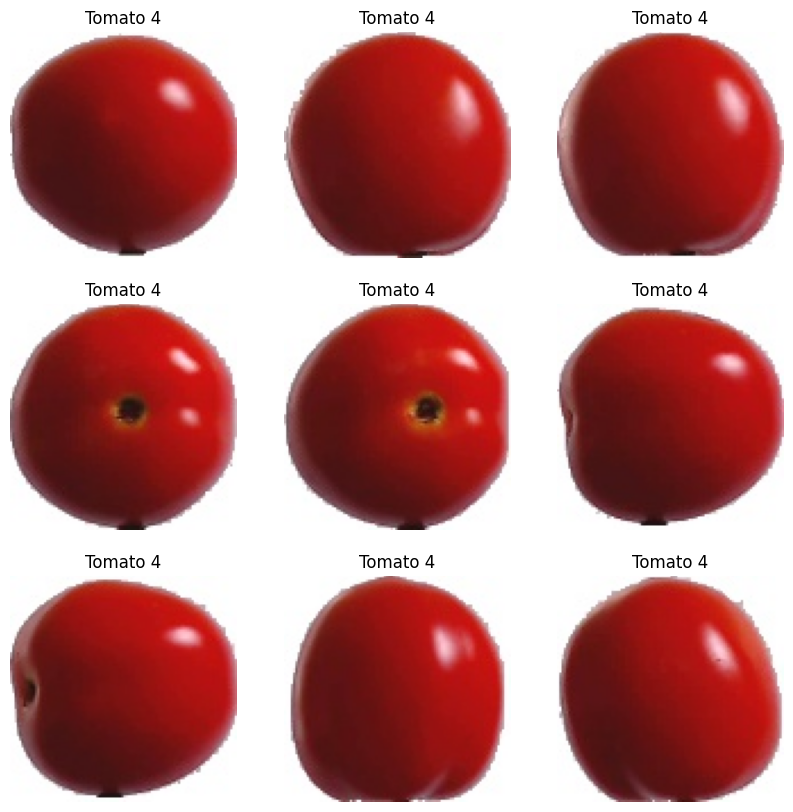

In [9]:
# Funktion för att läsa in bilder och etiketter från en angiven mapp
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_path = os.path.join(folder, label)
        if os.path.isdir(label_path):  # Kontrollera om det är en mapp (en fruktsort)
            for img_file in os.listdir(label_path):
                img_path = os.path.join(label_path, img_file)
                image = Image.open(img_path)  # Ingen ändring av storlek behövs eftersom bilderna redan är 100x100
                images.append(np.array(image))
                labels.append(label)
    return np.array(images), np.array(labels)

# Läs in träningsdata
X_train, y_train = load_images_from_folder(training_dir)

# Visualisera exempelbilder från träningsdata
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Normalisera bilderna (skala pixelvärden till [0, 1] genom att dela med 255)
X_train = X_train / 255.0

# Omvandla etiketterna till numeriska värden (från strängar till unika nummer)
unique_labels = np.unique(y_train)
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
y_train_num = np.array([label_to_index[label] for label in y_train])

# Gör etiketterna kategoriska (one-hot encoding) för att passa CNN-modellen
y_train_cat = to_categorical(y_train_num)

# Dela upp träningsdata i tränings- och valideringsuppsättningar (80% träning, 20% validering)
X_train, X_val, y_train_cat, y_val_cat = train_test_split(X_train, y_train_cat, test_size=0.2, random_state=42)

# Kontrollera datans dimensioner
print(f"Träningsdata: {X_train.shape}, Träningsetiketter: {y_train_cat.shape}")
print(f"Valideringsdata: {X_val.shape}, Valideringsetiketter: {y_val_cat.shape}")

Träningsdata: (56392, 100, 100, 3), Träningsetiketter: (56392, 141)
Valideringsdata: (14099, 100, 100, 3), Valideringsetiketter: (14099, 141)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Skapa en enkel CNN-modell
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Lägg till dropout för att undvika överanpassning
    Dense(141, activation='softmax')  # 141 utgångar för varje fruktsort
])

# Kompilera modellen
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Visa modellens struktur
model.summary()

/Users/p/Desktop/CNN/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 141)            │        18,189 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,749,965 (6.68 MB)

 Trainable params: 1,749,965 (6.68 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 189s 107ms/step - accuracy: 0.3679 - loss: 2.6211 - val_accuracy: 0.9781 - val_loss: 0.0808
Epoch 2/10
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 240s 136ms/step - accuracy: 0.8264 - loss: 0.5183 - val_accuracy: 0.9873 - val_loss: 0.0363
Epoch 3/10
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 200s 114ms/step - accuracy: 0.8763 - loss: 0.3606 - val_accuracy: 0.9973 - val_loss: 0.0133
Epoch 4/10
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 297s 168ms/step - accuracy: 0.9054 - loss: 0.2730 - val_accuracy: 0.9989 - val_loss: 0.0050
Epoch 5/10
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 175s 99ms/step - accuracy: 0.9223 - loss: 0.2253 - val_accuracy: 0.9994 - val_loss: 0.0032
Epoch 6/10
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 186s 105ms/step - accuracy: 0.9337 - loss: 0.1930 - val_accuracy: 0.9999 - val_loss: 0.0024
Epoch 7/10
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 181s 103ms/step - accuracy: 0.9430 - loss: 0.1681 - val_accuracy: 0.9989 - val_loss: 0.0050
Epoch 8/10
1763/1763 ━━━━━━━━━━━━━━━━━━━━ 192s 109ms/step - acc

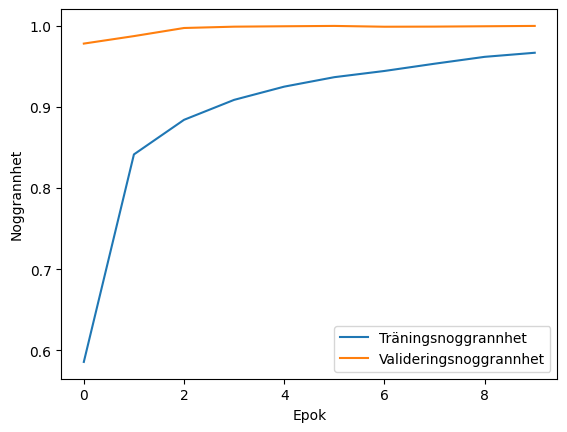

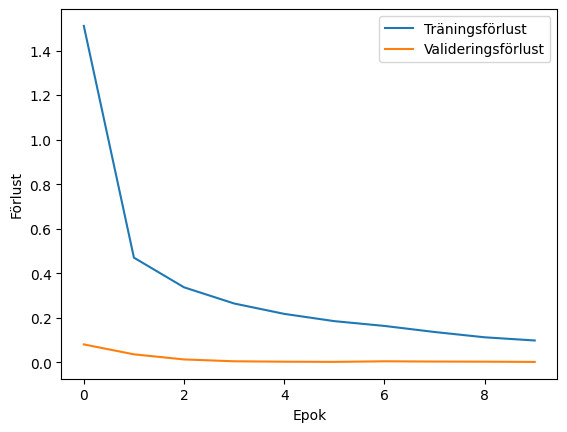

In [12]:
# Träna modellen
history = model.fit(
    X_train, y_train_cat,
    epochs=10,               # Vi börjar med 10 epoker
    batch_size=32,           # Batchstorlek för träningen
    validation_data=(X_val, y_val_cat)
)

# Visa träningens noggrannhet och förlust
plt.plot(history.history['accuracy'], label='Träningsnoggrannhet')
plt.plot(history.history['val_accuracy'], label='Valideringsnoggrannhet')
plt.xlabel('Epok')
plt.ylabel('Noggrannhet')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Träningsförlust')
plt.plot(history.history['val_loss'], label='Valideringsförlust')
plt.xlabel('Epok')
plt.ylabel('Förlust')
plt.legend(loc='upper right')
plt.show()

In [14]:
# Sökväg till testmappen
test_dir = '/Users/p/Desktop/CNN/fruits-360_dataset_100x100/fruits-360/Test'

# Läs in och normalisera testdata
X_test, y_test = load_images_from_folder(test_dir)
X_test = X_test / 255.0

# Omvandla testetiketter till numeriska värden och one-hot encoding
y_test_num = np.array([label_to_index[label] for label in y_test])
y_test_cat = to_categorical(y_test_num)

# Utvärdera modellen på testdata
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=2)
print(f"Test noggrannhet: {test_accuracy}")
print(f"Test förlust: {test_loss}")

739/739 - 19s - 25ms/step - accuracy: 0.9757 - loss: 0.1480
Test noggrannhet: 0.9756975173950195
Test förlust: 0.14799903333187103


In [15]:
# Spara modellen till en fil
model.save('fruits360_cnn_model.h5')
print("Modellen har sparats som 'fruits360_cnn_model.h5'.")

# För att ladda modellen vid behov kan du använda följande kod
# from tensorflow.keras.models import load_model
# model = load_model('fruits360_cnn_model.h5')
# print("Modellen har laddats.")

Modellen har sparats som 'fruits360_cnn_model.h5'.
